## Homework 07
** CSC 19900 - Introduction to Data Science**

** Due Wednesday, Nov. 8**

### Part 0: Import Packages

Import the `numpy` and `matplotlib.pyplot` packages under the names `np` and `plt`, respectively.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Part 1: Counting Coin Flipping Streaks

Define a function called `flipCoin()` that takes a single parameter `n`, which has a default value of 100. The function should return an array with `n` elements. Each element of the array should be either 'H' or 'T' (representing heads and tails). The elements should be randomly generated, with the two outcomes equally likely. 

In [2]:
def flipCoin(n=100):
    return np.random.choice(['H', 'T'], n)

Set the seed equal equal to 5 and call the function `flipCoin()` without passing it an argument. Store the result in a variable. Create two more variables: one that is equal to the number of simulated flips that resulted in heads, and one that is equal to the number of simulated flips that resulted in tails. Then print the following two messages, with the bracketed expressions replaces with the appropriate numerical values. 

    The number of flips that resulted in heads is [count of heads]. 
    The number of flips that resulted in tails is [count of tails]. 

In [3]:
np.random.seed(5)
flips = flipCoin()
print(sum(flips == 'H'))
print(sum(flips == 'T'))

46
54


Perform the following steps in the next cell:
1. Set the seed equal to 5.
2. Call `flipCoin()` again, passing it 1000 as an argument. Store the result in `flips`. 
3. Create an empty list called `streaks`. 
4. Use a loop to store the lengths of strings of consecutive heads or tails in `flips`. For instances, if `flips` were equal to `['H', 'H', 'T', 'H', 'T', 'T', 'T']`, then `streaks` should be `[2, 1, 1, 3]`.
5. Print the size of the largest streak. If your code is correct, this should be 8. 

Hint: Create a variable called `count`. Loop over the elements of `flips`. If a particular element is equal to the previous one, then increment `count` and move on. Otherwise, add the current count to `streaks` and then reset the count. 

In [4]:
np.random.seed(5)
flips = flipCoin(1000)

streaks = []

count = 1

for i in range(1, len(flips)):
    if(flips[i] == flips[i-1]):
        count += 1
    else: 
        streaks.append(count)
        count = 1
        
streaks.append(count)

print(max(streaks))

8


Perform the following steps in the next cell:
1. Convert `streaks` to a numpy array. 
2. Create a list called `streakDist`. Use a loop to add values to `streakDist` so that the first element counts the number of streaks of length 1, the second element counts the number of streaks of length 2, and so on. 
3. Create a bar plot graphically representing `streakDist`. The bar plot should have the following properties:
  * The `x` axis should be numbered 1 - 8 and should be labeled "Streak Length".
  * The `y` axis should be labeled "Count".
  * The plot should be titled "Distribution of Streak Lengths". 

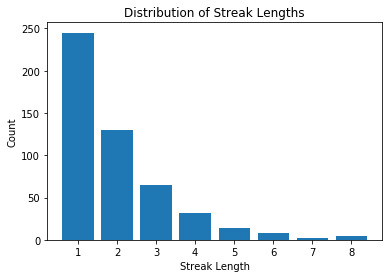

In [218]:
streaks = np.array(streaks)
streakDist = []
for i in range(1, max(streaks) + 1):
    streakDist.append(sum(streaks == i))
    
plt.bar(range(1, max(streaks) + 1), streakDist)
plt.xlabel('Streak Length')
plt.ylabel('Count')
plt.title('Distribution of Streak Lengths')
plt.show()

### Part 2: Random Walk

Create a function called `rWalk2D()` that takes a single parameter `n`, with a default value of 100. The function should generate a 2-Dimensional random walk that starts that the origin (0,0) and takes a total of `n` steps. Each step should adjust the `x` position by an amount selected randomly from the values -1, -0.5, 0, 0.5, or 1. Each step should also asjust the `y` position by an amount randomly selected from the same set of values. 

The function should return two lists: `xPath` and `yPath`. These lists should store the `x` and `y` coordinates of the points that the walk passed through.

In [7]:
def rWalk2D(n = 100):
    steps = [-1,-0.5, 0, 0.5, 1]
    xPath = [0]
    yPath = [0]
    
    for i in range(0,n):
        xPath.append(xPath[-1] + np.random.choice(steps))
        yPath.append(yPath[-1] + np.random.choice(steps))
        
    return xPath,yPath

Set the seed equal to 27 and call `rWalk2D()` with no parameters. Then use the function `plt.plot(x_coord, y_coord)` to plot the path followed by the random walk. 

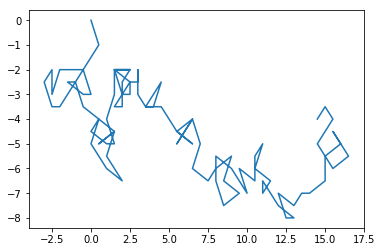

In [8]:
np.random.seed(27)
x,y = rWalk2D()

plt.plot(x,y)
plt.show()

Complete the following tasks in the next cell:
1. Set the seed to 1. 
2. Create two empty lists, `endX` and `endY`. 
3. Generate 500 random walks. For each walk, store the `x` and `y` coordinates of the final point of the walk in the lists `endX` and `endY`. 
4. Use the function `plt.scatter(x_coord,y_coord)` to create a scatter plot of the final points of each of the 500 random walks. 

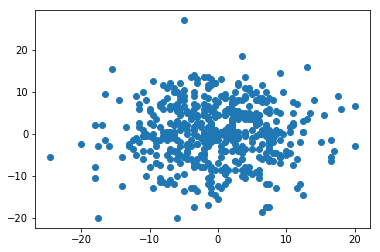

In [11]:
np.random.seed(1)

endX = []
endY = []

for i in range(0,500):
    x,y = rWalk2D()
    endX.append(x[-1])
    endY.append(y[-1])
    
plt.scatter(endX,endY)
plt.show()

Complete the following taks in the next cell:
1. Create a function called `distance(P,Q)` that returns the distance between points `P` and `Q`. 
2. Create a list to store the distances between the origin and each of the 500 ending points for the walks generated above. 
3. Convert the lists of distances into a numpy array. 
4. Create the following variables, all rounded to 2 decimal places:
  * p20 should contain the percentage of walks that ended less than or equal to 20 units away from the origin. 
  * p40 should contain the percentage of walks that ended more than 20, but less than or equal to 40 units away from the origin. 
  * p60 should contain the percentage of walks that ended more than 20, but less than or equal to 40 units away from the origin. 
  * p80 should contain the percentage of walks that ended more than 20, but less than or equal to 40 units away from the origin. 
  * p100 should contain the percentage of walks that ended more than 20, but less than or equal to 40 units away from the origin. 
5. Print the following 5 messages, with the brackets expressions replaces with numerical values:

    
    [p20]% of the walks end within 20 units away from the origin.    
    [p40]% of the walks end between 20 and 40 units away from the origin.
    [p60]% of the walks end between 40 and 60 units away from the origin.
    [p80]% of the walks end between 60 and 80 units away from the origin.
    [p100]% of the walks end between 80 and 100 units away from the origin.


In [12]:
def distance(P,Q):
    return ( (P[0] - Q[0])**2 + (P[1] - Q[1])**2 )**0.5

distances = []

for i in range(0, len(endX)):
    temp = distance( [0,0], [endX[i], endY[i]] )
    distances.append(temp)

distances = np.array(distances)
    
p20 = round(sum(distances <= 20)/5,2)
p40 = round(sum((distances > 20) & (distances <= 40) )/5,2)
p60 = round(sum((distances > 40) & (distances <= 60) )/5,2)
p80 = round(sum((distances > 60) & (distances <= 80) )/5,2)
p100 = round(sum((distances > 80) & (distances <= 100))/5,2)


print( str(p20) +  "% of the walks end within 20 units away from the origin.")
print( str(p40) +  "% of the walks end between 20 and 40 units away from the origin.")
print( str(p60) +  "% of the walks end between 40 and 60 units away from the origin.")
print( str(p80) +  "% of the walks end between 60 and 80 units away from the origin.")
print( str(p100) +  "% of the walks end between 80 and 100 units away from the origin.")

98.0% of the walks end within 20 units away from the origin.
2.0% of the walks end between 20 and 40 units away from the origin.
0.0% of the walks end between 40 and 60 units away from the origin.
0.0% of the walks end between 60 and 80 units away from the origin.
0.0% of the walks end between 80 and 100 units away from the origin.
